In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import poisson, binom
from scipy.stats import pearsonr,spearmanr
import datetime

Evaluation Criteria (100 Points):

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data
    Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country
    
    4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

    4.2 For categorical variable(s): Boxplot (10 Points)
    
    4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)
    
    6.1 Comments on the range of attributes
    
    6.2 Comments on the distribution of the variables and relationship between them
    
    6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

# inserting the data and get info about data....

In [ ]:
netflix_df= pd.read_csv("/content/netflix.csv")

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
print(netflix_df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
netflix_df.shape

(8807, 12)

In [ ]:
netflix_df.describe(include="object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
# How much the Null values present in data frame?
netflix_df.isnull().sum()/len(netflix_df)*100


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
netflix_df['type'].value_counts(normalize=True)

type
Movie      0.696151
TV Show    0.303849
Name: proportion, dtype: float64

<Axes: ylabel='count'>

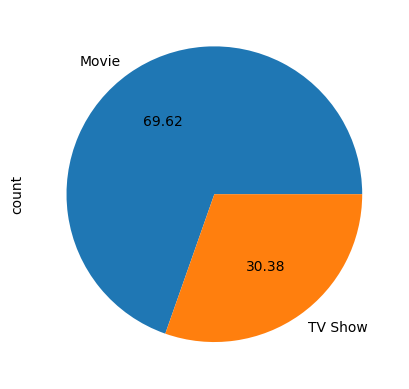

In [ ]:
netflix_df['type'].value_counts().plot(kind='pie',autopct="%.2f")

# Pre-processing and Un-Nestting Data

In [ ]:
## unesting of title with cast

constraint=netflix_df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new=pd.DataFrame(constraint,index=netflix_df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','cast']
df_new[df_new['cast']=='Rupa Bhimani']

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani
3386,Chhota Bheem & Ganesh,Rupa Bhimani
3393,Chhota Bheem & Krishna: Mayanagari,Rupa Bhimani
3400,Chhota Bheem & Krishna: Pataliputra- City of t...,Rupa Bhimani
3407,Chhota Bheem And The Broken Amulet,Rupa Bhimani
3414,Chhota Bheem And The Crown of Valhalla,Rupa Bhimani
3421,Chhota Bheem and the Incan Adventure,Rupa Bhimani


In [ ]:
## unesting of Title with directors

constraint=netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_director=pd.DataFrame(constraint,index=netflix_df['title'])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[['title',0]]
df_director.columns=['title','director']


In [ ]:
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [ ]:
## unesting of title with country

constraint=netflix_df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_country=pd.DataFrame(constraint,index=netflix_df['title'])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country=df_country[['title',0]]
df_country.columns=['title','country']


In [ ]:
df_country


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [ ]:
# unesting of Title with listed_in
constraint=netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint,index=netflix_df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3)
df_new3.reset_index(inplace=True)
df_new3=df_new3[['title',0]]
df_new3.columns=['title','listed_in']

In [ ]:
df_new3

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


Merging all the data...

### merging unnesting data


In [ ]:
#define the list as all data frame
df= [df_director,df_new, df_country,df_new3]

In [ ]:
from functools import reduce
df=reduce(lambda left, right:pd.merge(left,right, on=['title'], how='inner'),df)

In [ ]:
df

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [ ]:
T1=netflix_df.drop(["cast","director","country","listed_in"],axis=1)

In [ ]:
T1

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Dragged from civilian life, a former superhero..."


In [ ]:
##Recovering of lefover coulmn
T2=df.merge(T1, on='title',how='left')

In [ ]:
T2

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


# Q1:Defining Problem Statement and Analysing basic metrics (10 Points)

In [ ]:
T2.dtypes

title           object
director        object
cast            object
country         object
listed_in       object
show_id         object
type            object
date_added      object
release_year     int64
rating          object
duration        object
description     object
dtype: object

In [ ]:
T2.isna().sum()

title             0
director          0
cast              0
country           0
listed_in         0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
description       0
dtype: int64

In [ ]:
T2.select_dtypes(include=np.number) # No of Numeric columns

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021
...,...
201986,2015
201987,2015
201988,2015
201989,2015


#

#Q2: Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

In [ ]:
#shape of the data
T2.shape

(201991, 12)

This data set having 201991 records with 12 columns

In [ ]:
T2.isna().sum().sum()

228

In [ ]:
T2.describe() #Statstical Summary

,release_year
count,201991.000000
mean,2013.452891
std,9.003933
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


#Q3: Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

In [ ]:
T2['title'].value_counts()

title
Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Thackeray                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: count, Length: 8807, dtype: int64

In [ ]:
T2['title'].nunique()

8807

In [ ]:
T2['director'].value_counts()

director
nan                    50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Richard Maurice            1
Richard E. Norman          1
Spencer Williams           1
Oscar Micheaux             1
Kirsten Johnson            1
Name: count, Length: 4994, dtype: int64

In [ ]:
T2['cast'].value_counts()

cast
nan               2146
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Richard Ryan         1
Name: count, Length: 36440, dtype: int64

In [ ]:
T2['director'].nunique()

4994

In [ ]:
T2['cast'].nunique()

36440

# Q4: Visual Analysis - Univariate, Bivariate after pre-processing of the data Note: Pre-processing involves unnesting of the data in columns like Actor, Director, **Country**

##Q 4.1: For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

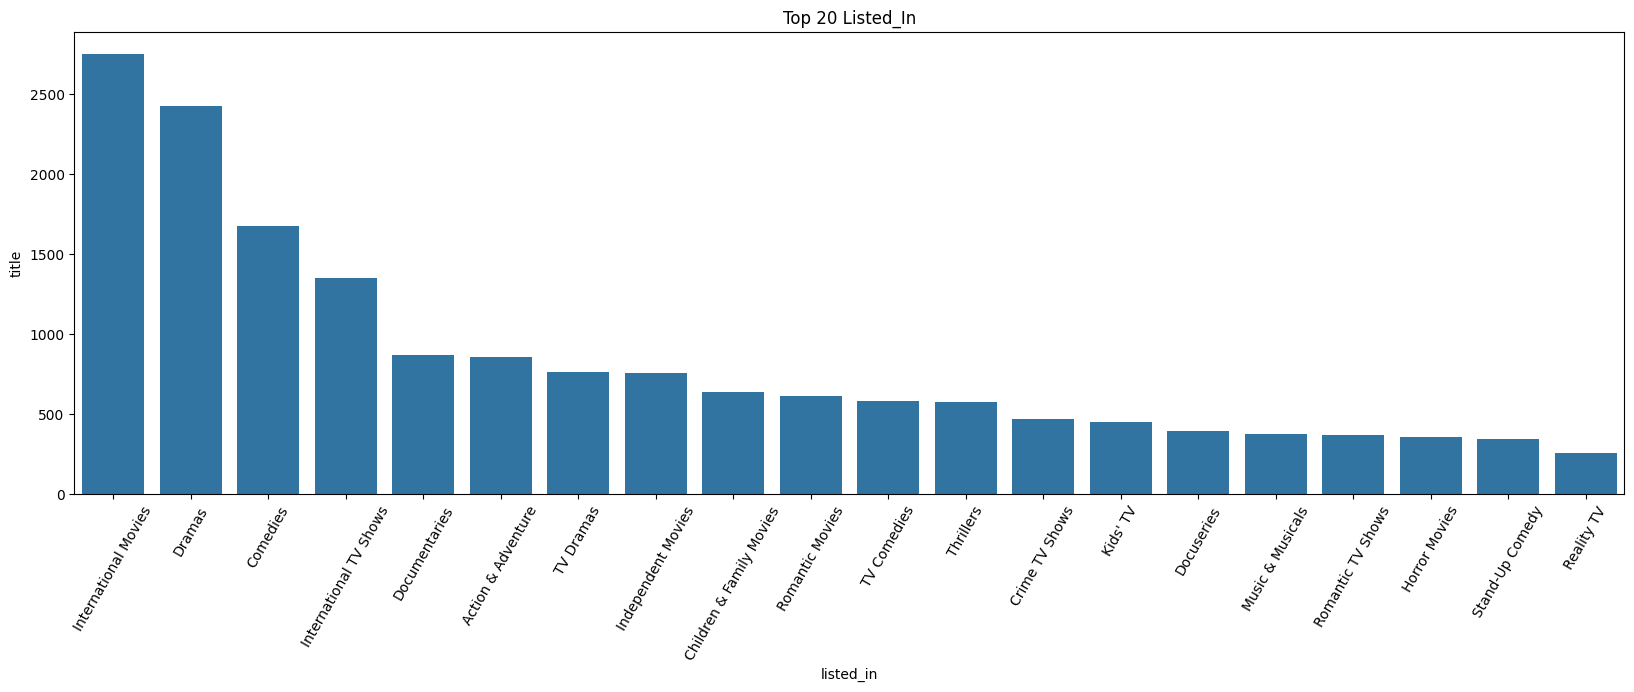

In [ ]:
df= T2.groupby(["listed_in"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:20]
plt.figure(figsize=(20,6))
sns.barplot(x = "listed_in", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 20 Listed_In")
plt.show()

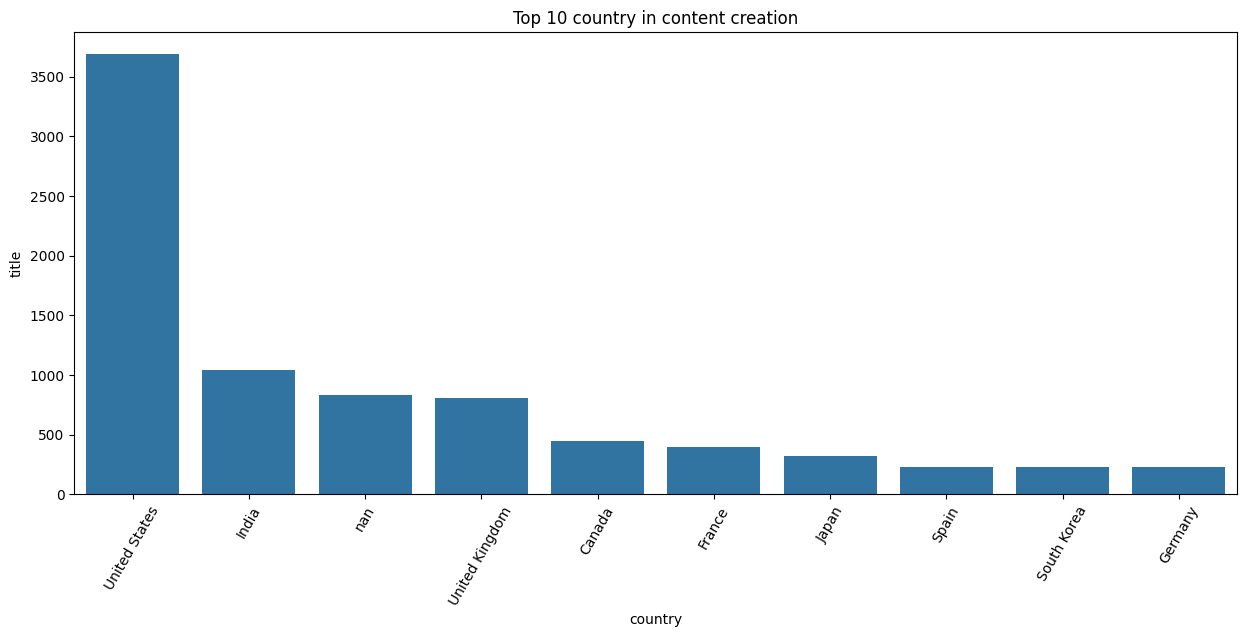

In [ ]:
df= T2.groupby(["country"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:10]
plt.figure(figsize=(15,6))
sns.barplot(x = "country", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 10 country in content creation")
plt.show()

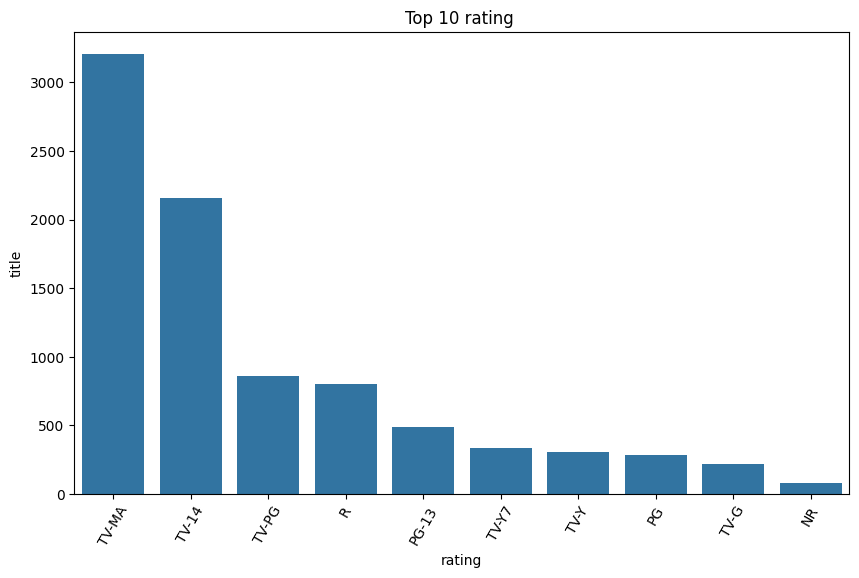

In [ ]:
df= T2.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x = "rating", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 10 rating ")
plt.show()

In [ ]:
df

,rating,title
11,TV-MA,3207
9,TV-14,2160
12,TV-PG,863
8,R,799
7,PG-13,490
14,TV-Y7,334
13,TV-Y,307
6,PG,287
10,TV-G,220
5,NR,80


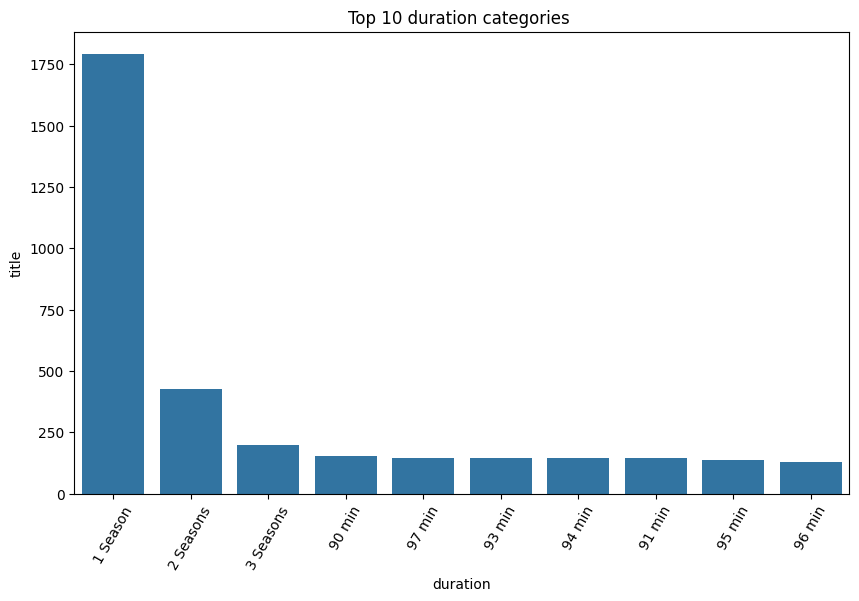

In [ ]:
df= T2.groupby(["duration"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x = "duration", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 10 duration categories ")
plt.show()

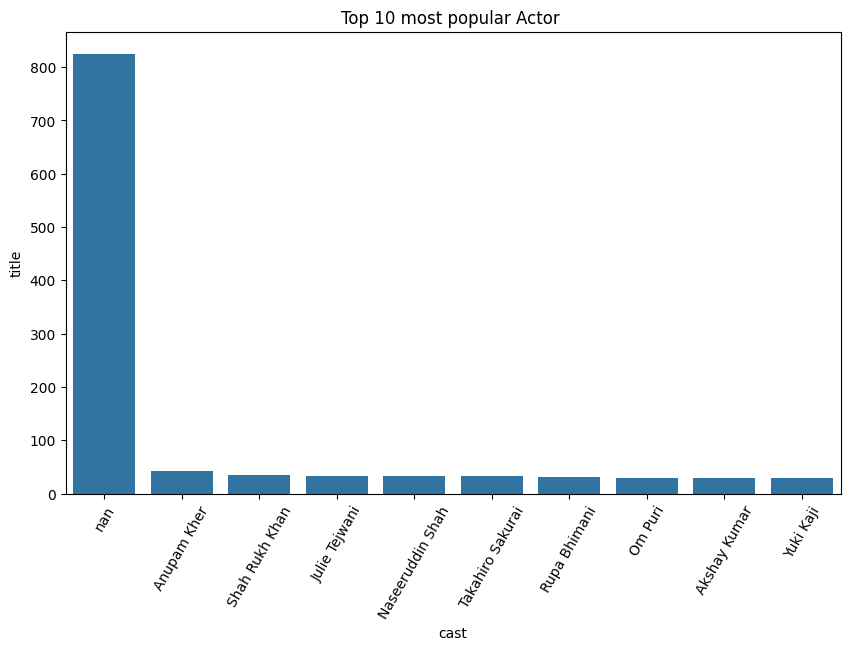

In [ ]:
df= T2.groupby(["cast"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x = "cast", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 10 most popular Actor ")
plt.show()

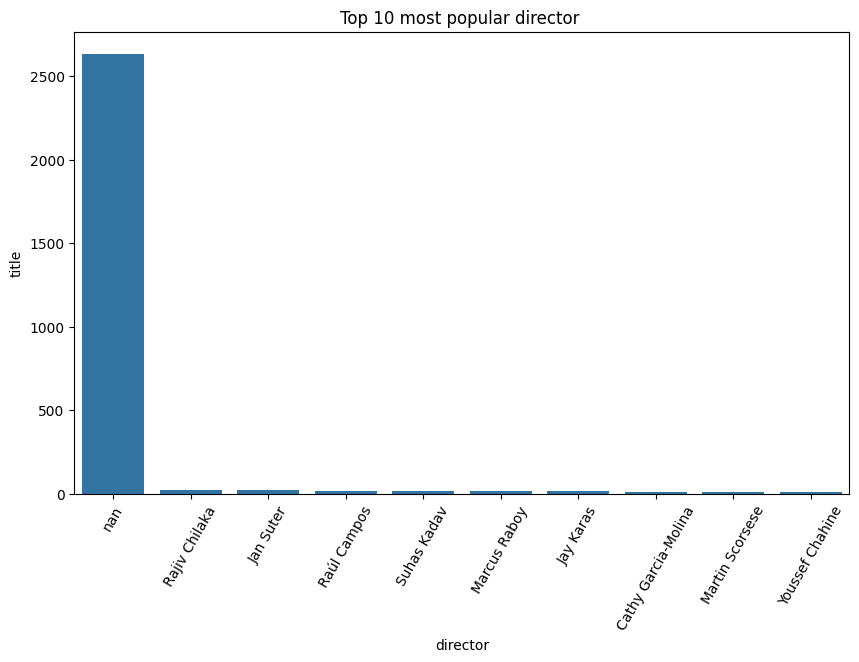

In [ ]:
df= T2.groupby(["director"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(x = "director", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 10 most popular director ")
plt.show()

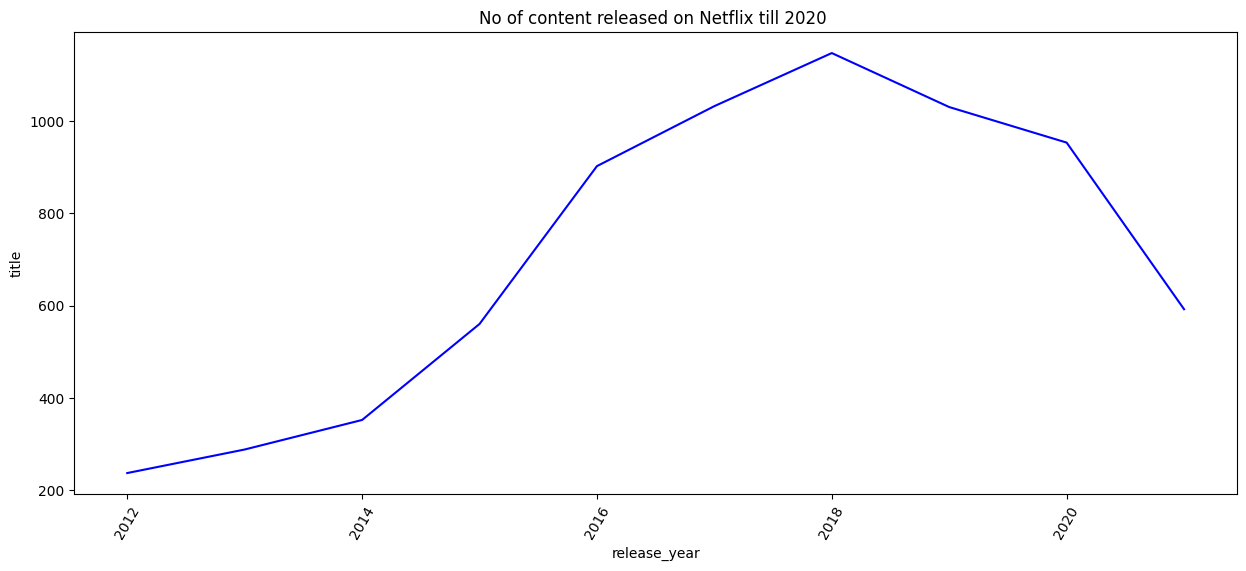

In [ ]:
df= T2.groupby(["release_year"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:10]
plt.figure(figsize=(15,6))
sns.lineplot(x = "release_year", y = "title", data = df, color="blue")
plt.xticks(rotation = 60)
plt.title("No of content released on Netflix till 2020 ")
plt.show()

The Amount of content released across the netflix has been increased from 2008 till 2019 and then decreased due to covid may be in 2020.

<Figure size 1500x600 with 0 Axes>

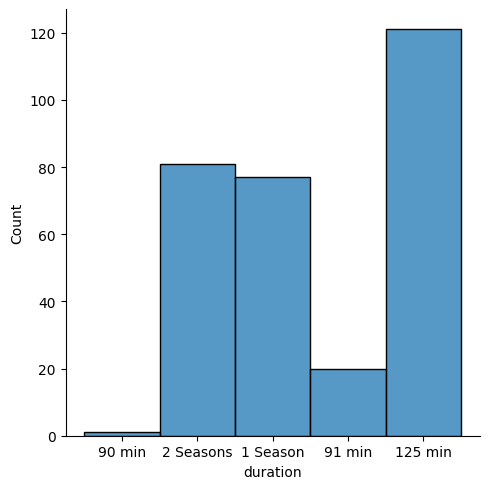

In [ ]:
##Histogram to see the distribution of duration
plt.figure(figsize=(15,6))
sns.displot(T2["duration"][:300])
plt.show()

Text(0.5, 1.0, 'Content Released over the year')

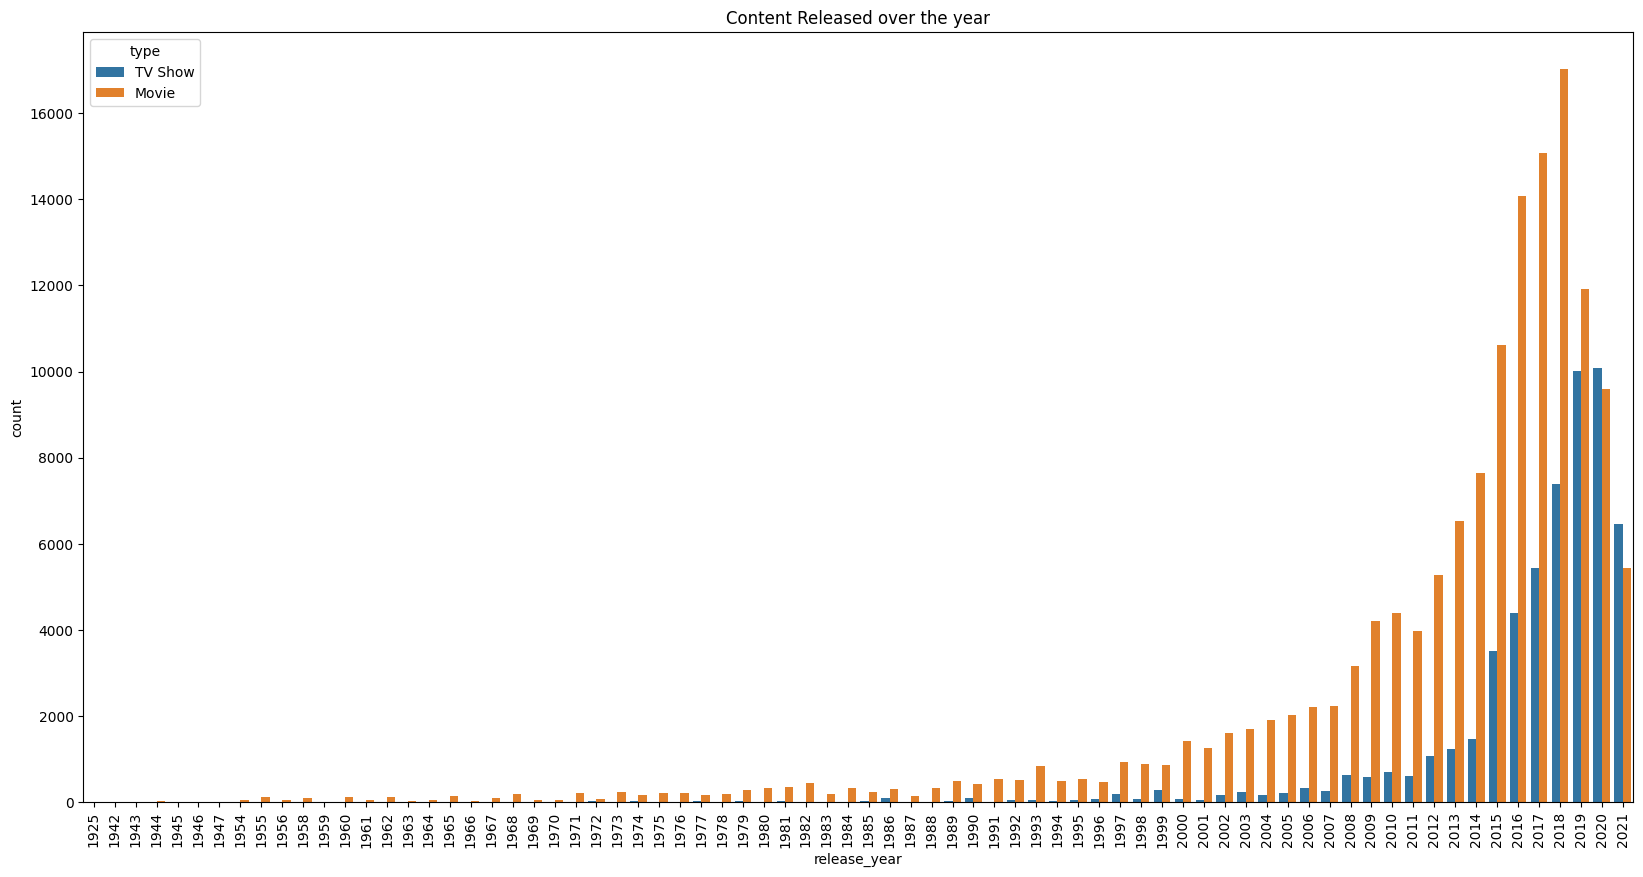

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.countplot(data = T2, x = "release_year", hue = "type")
plt.xticks(rotation = 90)
plt.title("Content Released over the year")

## Q 4.2 For categorical variable(s): Boxplot (10 Points)



In [ ]:
T2.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


(2000.0, 2022.0)

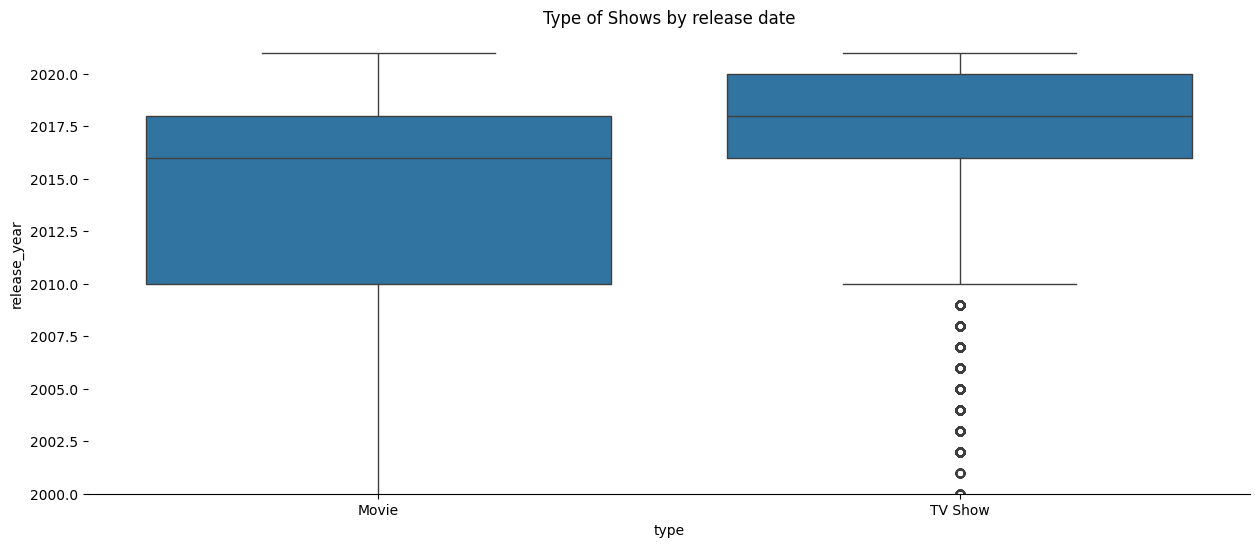

In [ ]:
## Boxplot for categorial variables(Bivariate variable)

plt.figure(figsize=(15,6))
sns.boxplot(x="type", y = "release_year", data = T2)
sns.despine(left = True)
plt.title("Type of Shows by release date")
plt.ylim(2000,2022)

From BOXplot we get to know that TV show mainly made in between 2016 to 2020 and have most of the outliers.

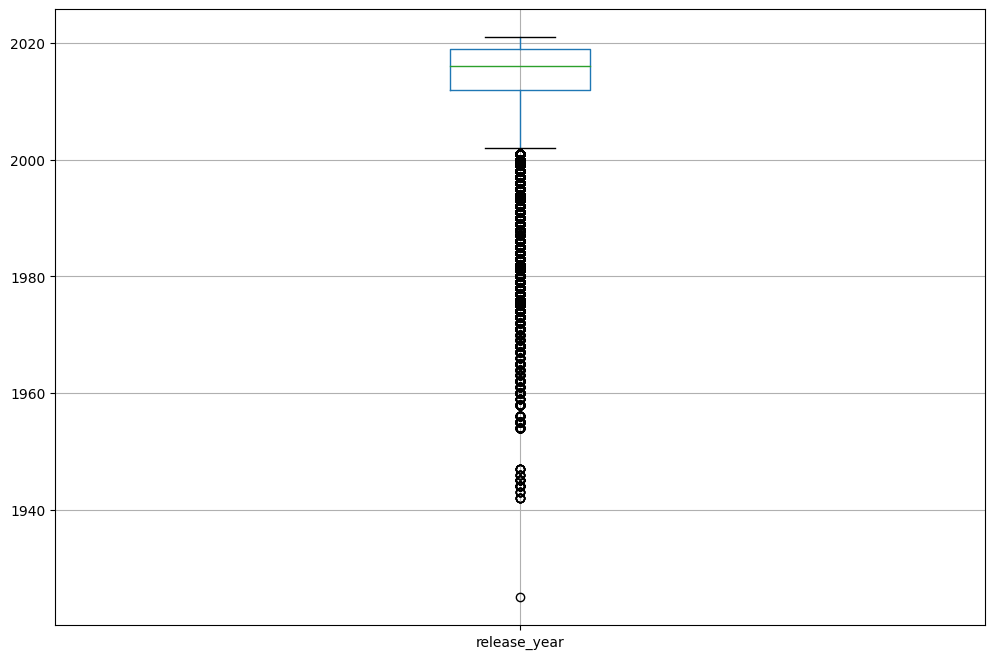

In [ ]:
## Missing Value and Outlier Check

plt.figure(figsize = (12,8))
T2.boxplot()
plt.show()

In [ ]:
## Missing Value & Outlier check Treatment Process

def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75,25])
  UL = Q3 + 1.5*(Q3 - Q1)
  return UL, Q1 - 1.5*(Q3 - Q1)

In [ ]:
for column in T2.columns:
  if T2[column].dtype != "object":
    UL, ll = outlier_limits(T2[column])
    T2[column] = np.where((T2[column]>UL)|(T2[column]<ll), np.nan, T2[column])

In [ ]:
T2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         201991 non-null  object 
 1   director      201991 non-null  object 
 2   cast          201991 non-null  object 
 3   country       201991 non-null  object 
 4   listed_in     201991 non-null  object 
 5   show_id       201991 non-null  object 
 6   type          201991 non-null  object 
 7   date_added    201833 non-null  object 
 8   release_year  185519 non-null  float64
 9   rating        201924 non-null  object 
 10  duration      201988 non-null  object 
 11  description   201991 non-null  object 
dtypes: float64(1), object(11)
memory usage: 18.5+ MB


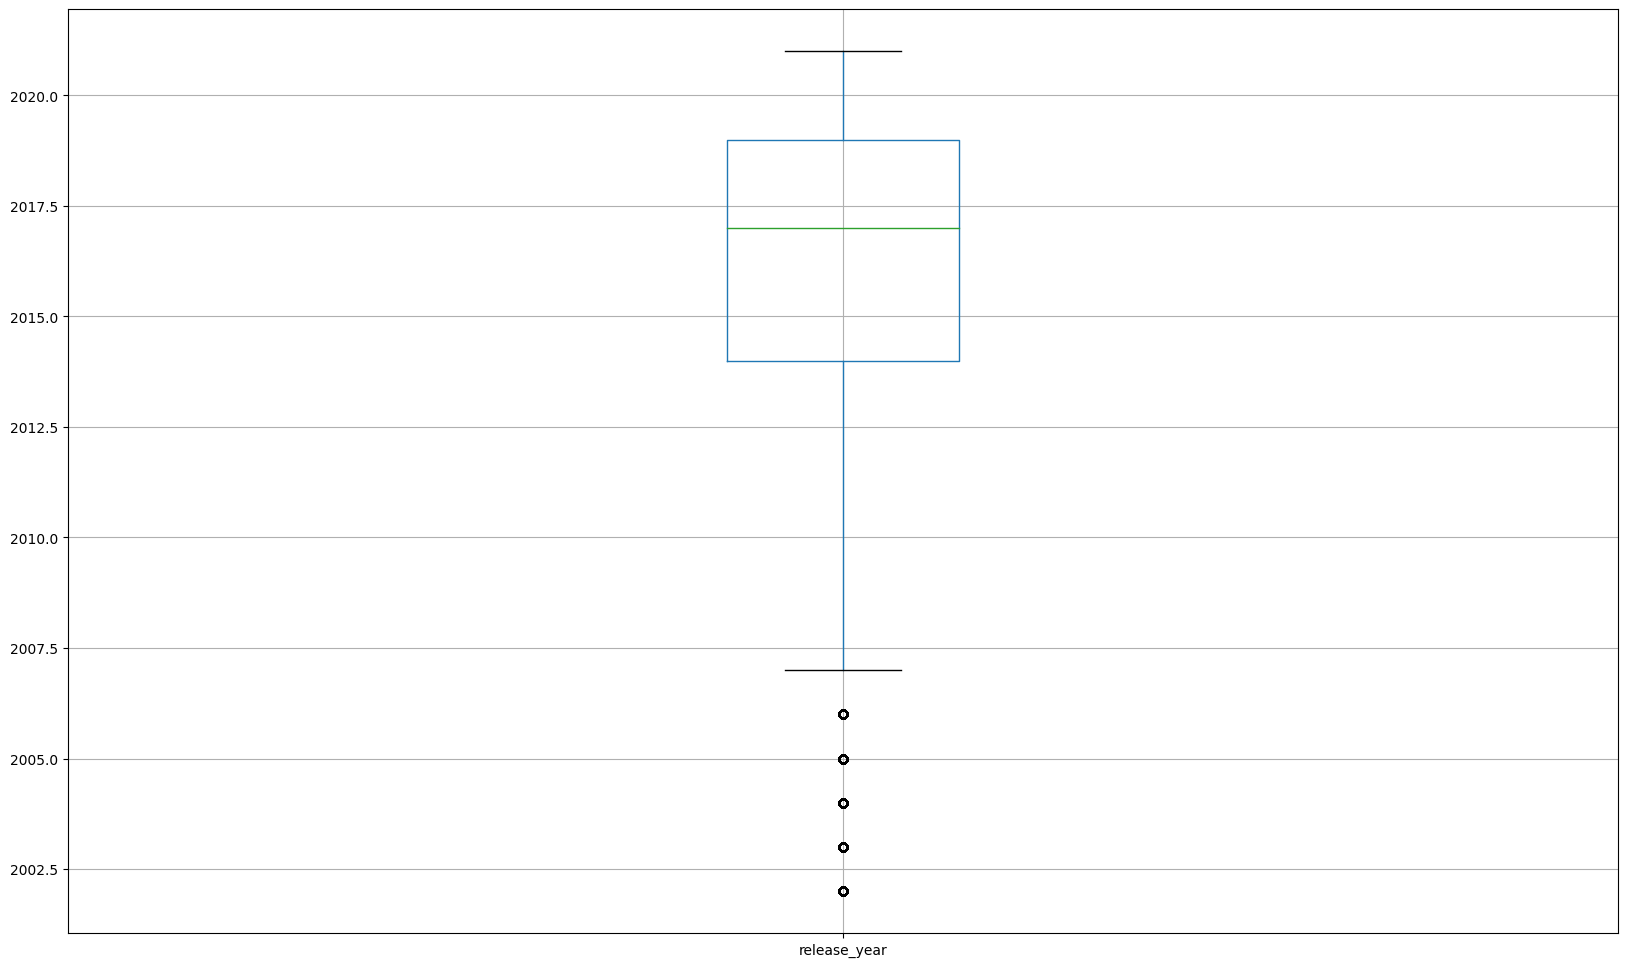

In [ ]:
## Missing Value and Outlier Check

plt.figure(figsize = (20,12))
T2.boxplot()
plt.show()

## Q 4.3 For correlation: Heatmaps, Pairplots (10 Points)

In [ ]:
T2.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Month
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020.0,PG-13,90 min,"As her father nears the end of his life, filmm...",September
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September


In [ ]:
try:
    T2['Month'] = pd.to_datetime(T2['date_added']).dt.strftime('%B')
except ValueError as e:
    print("Error:", e)

Error: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [ ]:
T2['Month'] = pd.to_datetime(T2['date_added'], format='mixed', dayfirst=True).dt.strftime('%B')



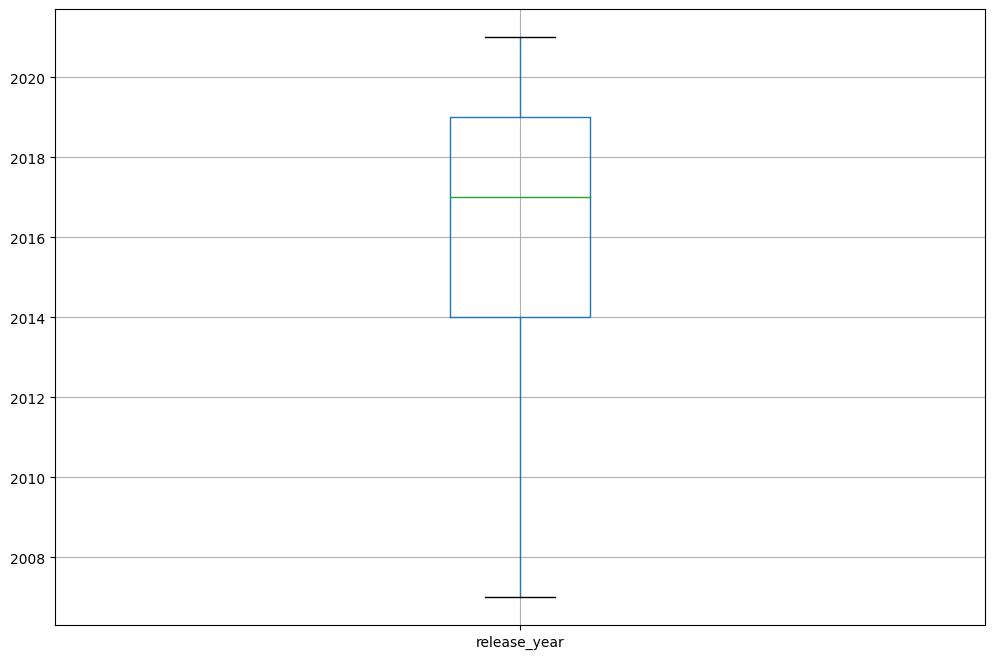

In [ ]:
## Missing Value and Outlier Check

plt.figure(figsize = (12,8))
T2.boxplot()
plt.show()

Overall, Now we will summarizes the number of content additions per month for each year and visualizes it as a heatmap, providing insights into the distribution of content additions over time.

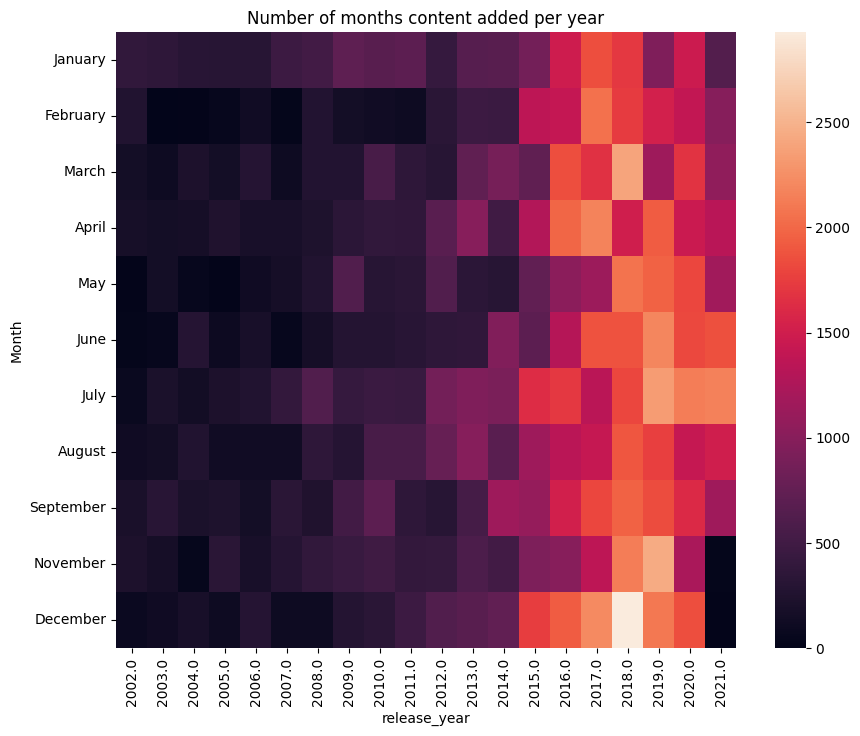

In [ ]:
Month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "November", "December"]
content = T2.groupby("release_year")["Month"].value_counts().unstack().fillna(0)[Month_order].T
plt.figure(figsize = (10,8))
plt.title("Number of months content added per year")
sns.heatmap(content)
plt.show()

# Q5. Missing Value & Outlier check (Treatment optional) (10 Points)

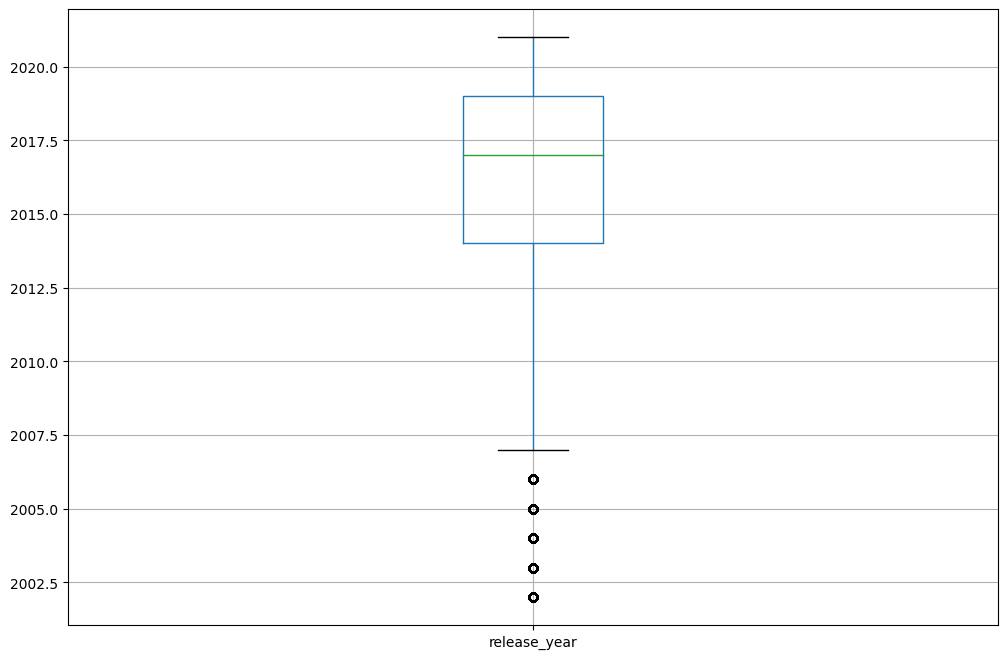

In [ ]:
## Missing Value and Outlier Check

plt.figure(figsize = (12,8))
T2.boxplot()
plt.show()

In [ ]:
## Missing Value & Outlier check Treatment Process

def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75,25])
  UL = Q3 + 1.5*(Q3 - Q1)
  return UL, Q1 - 1.5*(Q3 - Q1)

In [ ]:
for column in T2.columns:
  if T2[column].dtype != "object":
    UL, ll = outlier_limits(T2[column])
    T2[column] = np.where((T2[column]>UL)|(T2[column]<ll), np.nan, T2[column])

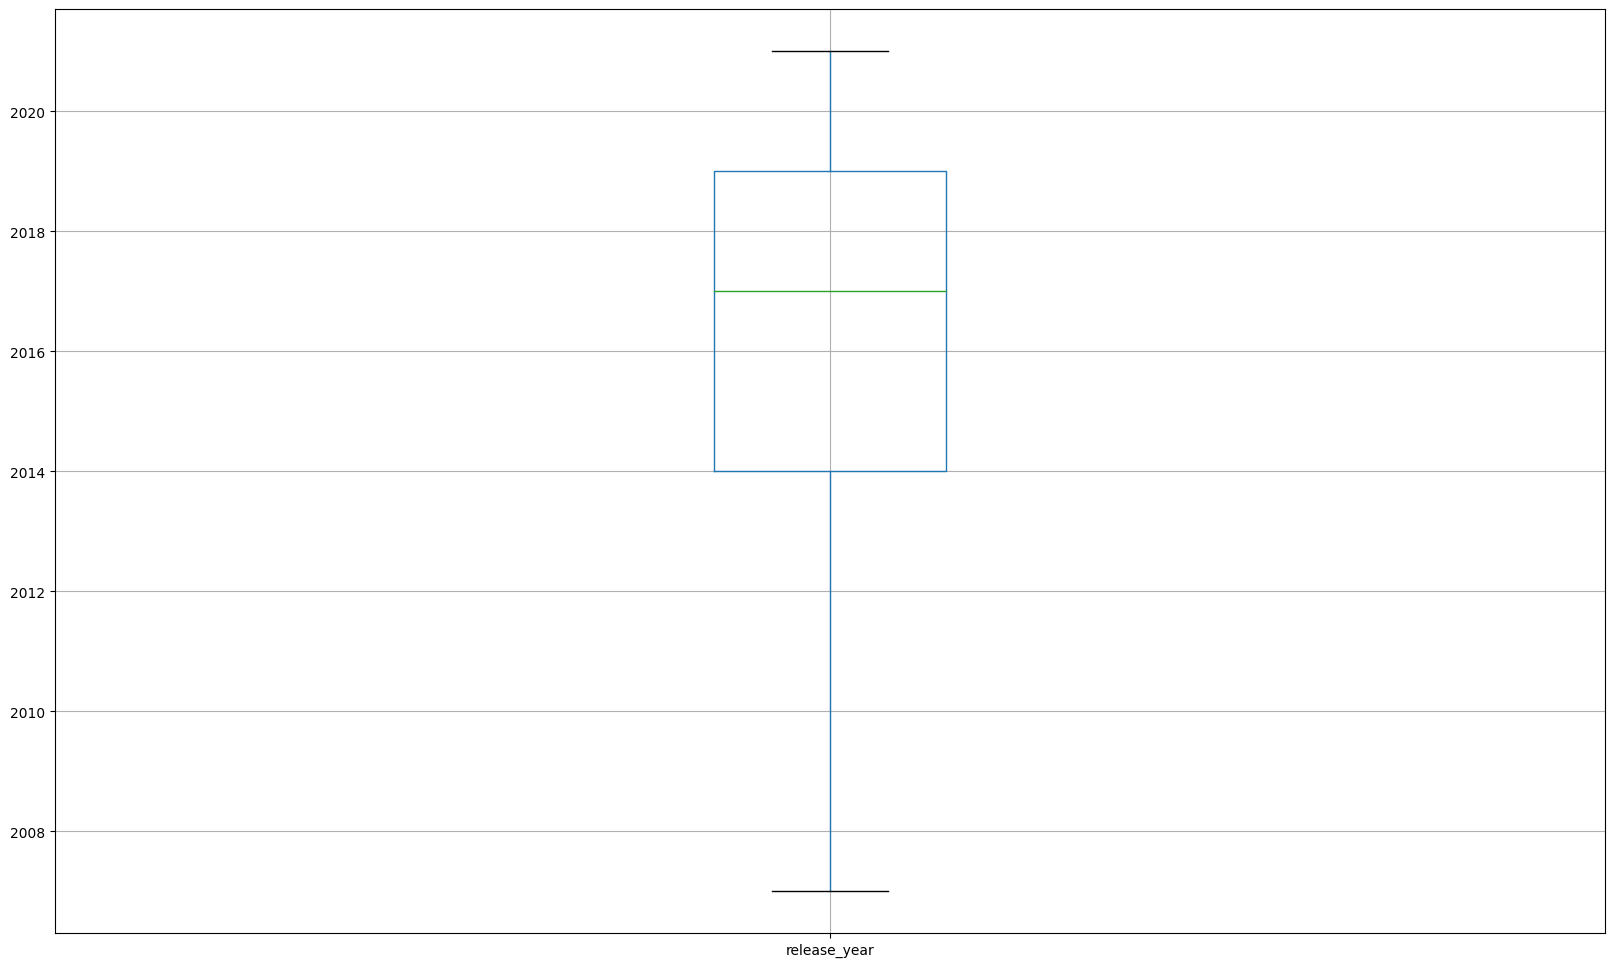

In [ ]:

plt.figure(figsize = (20,12))
T2.boxplot()
plt.show()

# Q 7. Business Insights (10 Points)


(1) Over the years both TV shows and movie contents addtion has increased till 2020, but after 2020 its started declining may be due to Covid relief, number of Movies added is more compare to TV shows over the years

(2) Most of the content get added in december and july month, for day wise, Friday is the best day followed by Thursday

(3) It was evident that 1st of every month was when the most content was added.

(4) Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most Watched content.

(5) Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

(6) Rajiv Chilaka director producing more movies

(7) Netflix is more focussing on movies compare to TV shows

(8) There is a 70:30 ratio of Movies and TV Shows content in Netflix platform

(9) International Movies, Dramas and Comedies are the most popular are most popular Genre

(10) US,India,UK,Canada and France are leading countries in Content Creation on Netflix

(11) Most of the highly rated content on Netflix is intended for Mature Audiences

(12) The duration of Most Watched content in our whole data is 80-120 mins. These must be movies and Shows having only 1 Season.

(13)United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.

(14) Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix




# Q 8 RECOMMENDATION

Recommendation

(1) the most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so recommended to generate more content on these genres.

(2) Add TV Shows/ movies in the month of July 1st or August 1st.

(3) Add movies for Indian Audience, it has been declining since 2018.

(4) While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.

(5) For audience 80-120 mins is the recommended length for movies